In [ ]:
#Подключение к гугл диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#загрузка библиотек
import pandas as pd # для работы с таблицами
import numpy as np
import string # для работы со строками
from string import punctuation

!pip install razdel
from razdel import tokenize

!pip install pymystem3
from pymystem3 import Mystem

import os

In [ ]:
#удаление пунктуации

string.punctuation = string.punctuation + '…―@'
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

#токенизация
def text_to_tokens(text):
    tokens = list(tokenize(text))
    tokens_strings = [s.text for s in tokens]
    tokens_string = ''
    for token in tokens_strings:
        tokens_string += f'{token} '
    return tokens_string

mystem = Mystem()

#лемматизация
def lemma(text):
   tokens = mystem.lemmatize(text.lower())
   tokens = [token for token in tokens if token != ' ' and token != '  ']
   return tokens



Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
all_tables = pd.DataFrame()


# Определяем путь к папке с таблицами
folder_path = '/content/drive/MyDrive/swear_words_project/data'

file_list = os.listdir(folder_path)

for file in file_list:
    file_path = os.path.join(folder_path, file)
    data = pd.read_excel(file_path, engine='openpyxl')
    all_tables = pd.concat([all_tables, data], ignore_index=True)


In [ ]:
len(all_tables)

23342

In [ ]:
cols_for_del = ['Speaker_2', 'Comments','Com_type', 'Who is it', 'speaker_0', 'Unnamed: 7', 'Unnamed: 8', 'ОБЩИЙ КОММЕНТАРИЙ: неразбериха со спикерами']

In [ ]:
for col in cols_for_del:
  del all_tables[col],

In [ ]:
all_tables
len(all_tables)

23342

In [ ]:
#all_tables.to_excel('/content/drive/MyDrive/swear_words_project/all_tables.xlsx')

In [ ]:
#pre_all_tables = all_tables
#prep_texts = []
#pre_all_tables['Preprocessed_text'] = list(map(preproccessing, pre_all_tables['Text']))
#for text in all_tables['Text']:
  #text_str = str(text).strip()
  #prep_texts.append(lemma(text_to_tokens(remove_punctuation(text_str))))

In [ ]:
#pre_all_tables['Preprocessed_text'] = prep_texts
#pre_all_tables.to_excel('/content/drive/MyDrive/swear_words_project/pre_all_tables.xlsx')

310841


In [ ]:
pre_all_tables = pd.read_excel('/content/drive/MyDrive/swear_words_project/pre_all_tables.xlsx')
all_tokens = 0
for sent in list(pre_all_tables['Preprocessed_text']):
    for i in str(sent).split():
      all_tokens += 1
print(all_tokens)

286622


In [ ]:
# список слов, которые мы ищем
words_to_find = []
with open('/content/drive/MyDrive/swear_words_project/new_dic.txt', encoding='utf8') as f:
  for line in f:
    words_to_find.append(line.strip())

# создаем новый датафрейм для результатов
result_df = pd.DataFrame(columns=['Preprocessed_text', 'Swear_word', 'File_name', 'Time', 'Speaker', 'Text'])

# проходимся по строкам датафрейма
for index, row in pre_all_tables.iterrows():
    result_df.loc[len(result_df)] = [row['Preprocessed_text'], '', row['File_name'], row['Time'], row['Speaker'], row['Text']]
    # ищем слова из списка в строке
    for word in words_to_find:
        if word in str(row['Preprocessed_text']).split():
            result_df.loc[len(result_df)] = [row['Preprocessed_text'], word, row['File_name'], row['Time'], row['Speaker'], row['Text']]


In [ ]:
#result_df.to_excel('/content/drive/MyDrive/swear_words_project/draft_tri.xlsx')

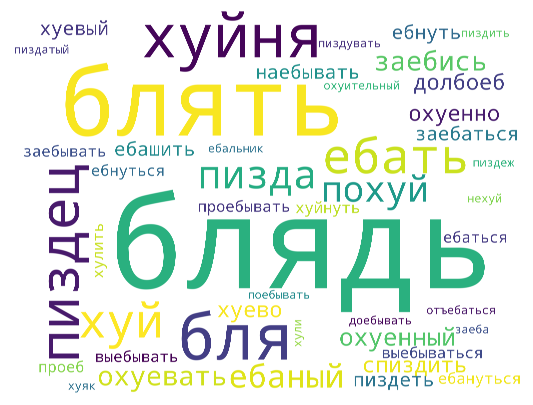

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_freq = {"блядь":234,"блять":110,"бля":39,"хуйня":34,"пиздец":28,"ебать":21,"хуй":20,"пизда":14,"похуй":11,"ебаный":9,"заебись":6,"охуевать":6,"охуенный":5,"долбоеб":4,"охуенно":4,"спиздить":4,"хуево":4,"ебашить":3,"ебнуть":3,"заебаться":3,"наебывать":3,"пиздеть":3,"хуевый":3,"выебывать":2,"выебываться":2,"ебануться":2,"ебаться":2,"ебнуться":2,"заебывать":2,"проеб":2,"проебывать":2,"хуйнуть":2,"хулить":2,"доебывать":1,"ебальник":1,"заеба":1,"нехуй":1,"отъебаться":1,"охуительный":1,"пиздатый":1,"пиздеж":1,"пиздить":1,"пиздувать":1,"поебывать":1,"хули":1,"хуяк":1}
wordcloud = WordCloud(width=400, height=300, random_state=21, max_font_size=100, colormap='viridis', background_color='white', scale=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Коммуникативные ситуации

Создание выборок

In [ ]:
all_data = pd.read_excel('/content/drive/MyDrive/swear_words_project/pre_all_tables.xlsx')

the_first = pd.DataFrame(columns=all_data.columns)
the_second = pd.DataFrame(columns=all_data.columns)
the_third = pd.DataFrame(columns=all_data.columns)


episodes_the_first = ["escAF019-02","escAF019-03","escAF019-04","escAF019-05","escAF019-06","escAF019-07","escAF019-08","escAF019-09","escAF019-10","escAF019-11","escAF019-14","escAF019-15","escAF019-16","escAF019-17","escAF019-19","escAF019-20","escAF019-21","escAF019-22","escAF020-35","escAF022-01","escAF022-02","escAF022-04","escAF022-05","escAF024-25","escAF002-02","escAF011-01","escAF011-02","escAF011-03","escAF011-04","escAF011-05","escAF011-06","escAF011-07","escAF011-10","escAF011-13","escAF011-14","escAF011-15","escAF011-16","escAF011-17","escAF011-10","escAF011-14","escAF008-03","escAF008-04","escAF008-05","escAF008-07","escAF008-08","escAF008-12","escAF008-14","escAF013-01","escAF013-09","escAF014-03","escAF014-07"]
episodes_the_second = ["escAF001-04","escAF019-01","escAF020-02","escAF020-03","escAF020-09","escAF020-10","escAF020-12","escAF020-13","escAF020-15","escAF020-16","escAF020-31","escAF020-32","escAF020-33","escAF024-01","escAF024-02","escAF024-03","escAF024-05","escAF024-06","escAF024-08","escAF024-09","escAF024-10","escAF024-12","escAF024-13","escAF024-14","escAF024-15","escAF024-16","escAF024-18","escAF024-19","escAF024-20","escAF024-21","escAF024-22","escAF024-23","escAF024-24","escAF025-05","escAF025-09","escAF025-10","escAF025-13","escAF004-02","escAF004-03","escAF011-09","escAF012-04","escAF012-06","escAF012-13","escAF012-15","escAF007-02","escAF007-05","escAF007-09","escAF007-12","escAF007-13","escAF007-14","escAF007-15","escAF009-05","escAF009-06","escAF009-07","escAF009-08","escAF009-09","escAF009-10","escAF009-11","escAF009-12","escAF009-13","escAF009-14","escAF009-15","escAF009-16","escAF009-20","escAF014-24","escAF017-50","escAF017-53","escAF021-03","escAF021-04","escAF023-20","escAF023-21"]
episodes_the_third = ["escAF001-01","escAF001-02","escAF001-03","escAF001-08","escAF001-09","escAF001-11","escAF001-12","escAF001-13","escAF001-14","escAF001-15","escAF001-16","escAF019-13","escAF019-14","escAF020-01","escAF020-04","escAF020-05","escAF020-06","escAF020-07","escAF020-08","escAF020-17","escAF020-18","escAF020-19","escAF020-25","escAF020-36","escAF020-38","escAF022-07","escAF022-08","escAF022-09","escAF022-10","escAF022-11","escAF022-12","escAF022-13","escAF024-04","escAF025-01","escAF025-04","escAM001-12","escAM001-14","escAF002-01","escAF002-03","escAF002-04","escAF002-05","escAF002-06","escAF002-07","escAF002-09","escAF002-10","escAF002-11","escAF002-12","escAF002-13","escAF002-14","escAF002-15","escAF002-16","escAF002-19","escAF002-21","escAF003-20","escAF011-20","escAF011-21","escAF011-22","escAF011-25","escAF011-26","escAF012-03","escAF012-05","escAF012-07","escAF012-10","escAF007-01","escAF007-11","escAF008-01","escAF008-02","escAF008-10","escAF009-02","escAF009-03","escAF009-04","escAF009-22","escAF017-01","escAF017-05","escAF017-11","escAF017-41","escAF021-05","escAF021-06","escAF021-10","escAF021-11","escAF023-02","escAF023-07","escAF023-09","escAF023-19","escAF023-22","escAF023-23"]



In [ ]:
for index, row in all_data.iterrows():
    if row['Episode'] in episodes_the_first:
        # Если ячейка содержит любое значение из списка, записываем всю строку в пустой датасет
        the_first = pd.concat([the_first, pd.DataFrame([row])], ignore_index=True)
# Результат - пустой датасет с записанными строками
print(the_first)

     Unnamed: 0              File_name      Episode      Time    Speaker  \
0             0  escAF011-02.punc.xlsx  escAF011-02  00:00:39  speaker_0   
1             1  escAF011_02.punc.xlsx  escAF011-02  00:00:49  speaker_1   
2             2  escAF011_02.punc.xlsx  escAF011-02  00:01:10  speaker_1   
3             3  escAF011_02.punc.xlsx  escAF011-02  00:01:15  speaker_1   
4             4  escAF011_02.punc.xlsx  escAF011-02  00:01:47  speaker_0   
...         ...                    ...          ...       ...        ...   
3802      22716  escAF019_02.punc.xlsх  escAF019-02  00:21:25  speaker_2   
3803      22717  escAF019_02.punc.xlsх  escAF019-02  00:21:26  speaker_1   
3804      22718  escAF019_02.punc.xlsх  escAF019-02  00:21:29  speaker_2   
3805      22719  escAF019_02.punc.xlsх  escAF019-02  00:21:31  speaker_1   
3806      22720  escAF019_02.punc.xlsх  escAF019-02  00:21:14  speaker_2   

                                                   Text  \
0     Аня, со скольки должны

In [ ]:
for index, row in all_data.iterrows():
    if row['Episode'] in episodes_the_second:
        # Если ячейка содержит любое значение из списка, записываем всю строку в пустой датасет
        the_second = pd.concat([the_second, pd.DataFrame([row])], ignore_index=True)
# Результат - пустой датасет с записанными строками
print(the_second)

     Unnamed: 0              File_name      Episode      Time    Speaker  \
0           168  escAF009_08.punc.xlsx  escAF009-08  00:00:00  speaker_0   
1           169  escAF009_08.punc.xlsx  escAF009-08  00:00:09  speaker_0   
2           170  escAF009_08.punc.xlsx  escAF009-08  00:00:19  speaker_1   
3           171  escAF009_08.punc.xlsx  escAF009-08  00:00:21  speaker_0   
4           172  escAF009_08.punc.xlsx  escAF009-08  00:00:40  speaker_1   
...         ...                    ...          ...       ...        ...   
8613      23337  escAF007_09.punc.xlsx  escAF007-09  00:24:37  speaker_1   
8614      23338  escAF007_09.punc.xlsx  escAF007-09  00:25:05  speaker_0   
8615      23339  escAF007_09.punc.xlsx  escAF007-09  00:25:07  speaker_0   
8616      23340  escAF007_09.punc.xlsx  escAF007-09  00:25:11  speaker_0   
8617      23341  escAF007_09.punc.xlsx  escAF007-09  00:25:17  speaker_0   

                                                   Text  \
0                     Да Гос

In [ ]:
for index, row in all_data.iterrows():
    if row['Episode'] in episodes_the_third:
        # Если ячейка содержит любое значение из списка, записываем всю строку в пустой датасет
        the_third = pd.concat([the_third, pd.DataFrame([row])], ignore_index=True)
# Результат - пустой датасет с записанными строками
print(the_third)

     Unnamed: 0              File_name      Episode      Time    Speaker  \
0           630  escAF002_10.punc.xlsх  escAF002-10  00:00:01  speaker_0   
1           631  escAF002_10.punc.xlsх  escAF002-10  00:01:37  speaker_1   
2           632  escAF002_10.punc.xlsх  escAF002-10  00:01:39  speaker_0   
3           633  escAF002_10.punc.xlsх  escAF002-10  00:01:40  speaker_1   
4           634  escAF002_10.punc.xlsх  escAF002-10  00:01:40  speaker_0   
...         ...                    ...          ...       ...        ...   
9262      22217  escAF012_03.punc.xlsх  escAF012-03  00:06:11  speaker_1   
9263      22218  escAF012_05.punc.xlsх  escAF012-05  00:00:15  speaker_0   
9264      22260  escAF012_07.punc.xlsх  escAF012-07  00:00:18  speaker_0   
9265      22261  escAF012_10.punc.xlsх  escAF012-10  00:00:08  speaker_0   
9266      22721  escAF023_22.punc.xlsх  escAF023-22  00:00:15  speaker_0   

                                                   Text  \
0     Жень, привет. Я сегодн

In [ ]:
the_first.to_excel('/content/drive/MyDrive/swear_words_project/the_first_participants.xlsx')

In [ ]:
the_second.to_excel('/content/drive/MyDrive/swear_words_project/the_second_participants.xlsx')

In [ ]:
the_third.to_excel('/content/drive/MyDrive/swear_words_project/the_third_participants.xlsx')

Ситуация 1

In [ ]:
all_tokens = 0
for sent in list(the_first['Preprocessed_text']):
    for i in str(sent).split():
      all_tokens += 1
print(all_tokens)

55704


Поиск обсценных слов

In [ ]:
# список слов, которые мы ищем
words_to_find = []
with open('/content/drive/MyDrive/swear_words_project/new_dic.txt', encoding='utf8') as f:
  for line in f:
    words_to_find.append(line.strip())

#создаем новый датафрейм для результатов
result_df = pd.DataFrame(columns=['Preprocessed_text', 'Swear_word', 'File_name', 'Time', 'Speaker', 'Text'])

# проходимся по строкам датафрейма
for index, row in the_first.iterrows():
    result_df.loc[len(result_df)] = [row['Preprocessed_text'], '', row['File_name'], row['Time'], row['Speaker'], row['Text']]
    # ищем слова из списка в строке
    for word in words_to_find:
        if word in str(row['Preprocessed_text']).split():
            result_df.loc[len(result_df)] = [row['Preprocessed_text'], word, row['File_name'], row['Time'], row['Speaker'], row['Text']]
result_df.to_excel('/content/drive/MyDrive/swear_words_project/the_first_swear_words.xlsx')

Ситуация 2

In [ ]:
all_tokens = 0
for sent in list(the_second['Preprocessed_text']):
    for i in str(sent).split():
      all_tokens += 1
print(all_tokens)

78930


In [ ]:
# список слов, которые мы ищем
words_to_find = []
with open('/content/drive/MyDrive/swear_words_project/new_dic.txt', encoding='utf8') as f:
  for line in f:
    words_to_find.append(line.strip())

#создаем новый датафрейм для результатов
result_df = pd.DataFrame(columns=['Preprocessed_text', 'Swear_word', 'File_name', 'Time', 'Speaker', 'Text'])

# проходимся по строкам датафрейма
for index, row in the_second.iterrows():
    result_df.loc[len(result_df)] = [row['Preprocessed_text'], '', row['File_name'], row['Time'], row['Speaker'], row['Text']]
    # ищем слова из списка в строке
    for word in words_to_find:
        if word in str(row['Preprocessed_text']).split():
            result_df.loc[len(result_df)] = [row['Preprocessed_text'], word, row['File_name'], row['Time'], row['Speaker'], row['Text']]
result_df.to_excel('/content/drive/MyDrive/swear_words_project/the_second_swear_words.xlsx')

Ситуация 3

In [ ]:
all_tokens = 0
for sent in list(the_third['Preprocessed_text']):
    for i in str(sent).split():
      all_tokens += 1
print(all_tokens)

140048


In [ ]:
# список слов, которые мы ищем
words_to_find = []
with open('/content/drive/MyDrive/swear_words_project/new_dic.txt', encoding='utf8') as f:
  for line in f:
    words_to_find.append(line.strip())

#создаем новый датафрейм для результатов
result_df = pd.DataFrame(columns=['Preprocessed_text', 'Swear_word', 'File_name', 'Time', 'Speaker', 'Text'])

# проходимся по строкам датафрейма
for index, row in the_third.iterrows():
    result_df.loc[len(result_df)] = [row['Preprocessed_text'], '', row['File_name'], row['Time'], row['Speaker'], row['Text']]
    # ищем слова из списка в строке
    for word in words_to_find:
        if word in str(row['Preprocessed_text']).split():
            result_df.loc[len(result_df)] = [row['Preprocessed_text'], word, row['File_name'], row['Time'], row['Speaker'], row['Text']]
result_df.to_excel('/content/drive/MyDrive/swear_words_project/the_third_swear_words.xlsx')